# Importing Python Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Importing functions to find the best model for our dataset 

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


# Importing Models  From Sklearn to Train 

In [3]:

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


In [4]:
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.metrics import geometric_mean_score

**Loading Dataset**

**Domain**

* The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

* It contains only numerical input variables which are the result of a PCA transformation.Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [5]:
df = pd.read_csv('creditcard.csv')

In [6]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

**Check For missing values** 

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64



**About the data**
* There are 31 columns and 25K+ rows.
* As we can see below there are no missing values in our dataset .
* There are no null values .
* Lastly all the columns contains Numerical values.
* Here class is the target column for us. [ If class = 0 that is a normal transaction and if class = 1 that is fraud transaction ]

In [10]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

* As we can see the data is imbalanced 
* The number of 0 [Normal Transaction] > > >  1 [ Fraud Transaction ]
* If we train our model with this dataset our model will give biased result. 


# EDA 


* EDA with Pandas Profiling

In [11]:
#!pip install pandas-profiling 

In [154]:
#please remove the '#' before executing this column 

# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='eda_dataset.html')

**Separating the data for analysis**

In [13]:
normal_transactions = df[df.Class == 0 ]
fraud_transaction = df[df.Class ==1]

In [14]:
print(normal_transactions.shape)
print(fraud_transaction.shape)

(284315, 31)
(492, 31)


* We are taking amount column because using of credit card as normal or fraud can be separated by the amount of money used from that credit card. 

In [15]:
normal_transactions.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fraud_transaction.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

* As we can see by using describe() function that the mean of fraud transaction is much higher than the mean of normal transactions. 

**Comparing the two columns**

In [17]:
df.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30 columns]

* This comparison of two columns is important for us because we can see the differences of two columns. 
* Our model can learn from this difference and classify which transaction is which

# Balancing the data 
* As we seen before our data is very imbalanced .
* And if we train our models with this imbalanced data it will give us biased output. 
* The number of Normal transaction[ class = 0] > > > Fraud Transaction[class =1]. So our model can take every transaction as normal. 
* Now we will take the same number of data of class  = 0 as class = 1 . 
* We will use under sampling

In [18]:
balanced_sample = df.sample(n = 492)

In [19]:
balanced_sample.shape

(492, 31)

* Now concatenating the two dataframes. 
* balanced_sample and our fraud_transaction 

In [20]:
df2 = pd.concat([balanced_sample,fraud_transaction],axis=0)
df2.head()

Time        V1        V2        V3        V4        V5        V6  \
238696  149781.0  2.030065 -1.489287  0.179812 -1.130240 -1.977871 -0.419616   
170709  120318.0  1.951908 -0.335994 -1.478355  0.205378  0.037934 -0.710378   
187822  127706.0  1.923074 -0.607329 -0.097953  0.403835 -0.816533  0.085372   
46128    42648.0 -0.384606 -0.806034  1.907147 -2.694972 -0.505327 -0.131972   
124169   77200.0 -0.314594 -0.260539  0.287212 -1.880735  1.728018  3.878866   

              V7        V8        V9  ...       V21       V22       V23  \
238696 -1.588559  0.079728  0.986955  ... -0.154227  0.111747  0.285652   
170709  0.057743 -0.130151  0.591629  ...  0.305400  0.851141 -0.082393   
187822 -0.959447  0.237782  1.196349  ...  0.039727  0.157968  0.243258   
46128  -0.563678 -0.007920 -2.075212  ... -0.020559  0.301391 -0.284782   
124169 -0.347134  1.107652  0.687522  ... -0.149428 -0.514823  0.156327   

             V24       V25       V26       V27       V28  Amount  Class  
238696 -0.094342 -0.736824  0.881805 -0.000349 -0.030786   52.00      0  
170709 -0.460601  0.200509 -0.092310 -0.034925 -0.066606   50.00      0  
187822 -0.507745 -0.541183  0.173017 -0.005269 -0.047663   25.00      0  
46128  -0.544934 -0.000174 -0.248319 -0.064888 -0.126633   12.00      0  
124169  1.049783 -0.343871  0.737480 -0.019950  0.035412   71.38      0  

[5 rows x 31 columns]

In [21]:
df2.describe()

Time          V1          V2          V3          V4  \
count     984.000000  984.000000  984.000000  984.000000  984.000000   
mean    89620.621951   -2.430057    1.799894   -3.534084    2.259555   
std     48345.844688    5.498593    3.709595    6.211214    3.236345   
min        71.000000  -30.552380   -8.480402  -31.103685   -4.485545   
25%     47390.000000   -2.877893   -0.113908   -5.084967   -0.138973   
50%     84204.000000   -0.842264    0.957324   -1.364081    1.343906   
75%    137295.750000    0.992671    2.793742    0.264193    4.288835   
max    170737.000000    2.312026   22.057729    3.937048   12.114672   

               V5          V6          V7          V8          V9  ...  \
count  984.000000  984.000000  984.000000  984.000000  984.000000  ...   
mean    -1.553586   -0.711385   -2.756461    0.315050   -1.283221  ...   
std      4.214813    1.743210    5.858244    4.845970    2.334599  ...   
min    -22.105532   -6.406267  -43.557242  -41.044261  -13.434066  ...   
25%     -1.736900   -1.599839   -3.078361   -0.239666   -2.310113  ...   
50%     -0.454374   -0.658972   -0.617327    0.156482   -0.745772  ...   
75%      0.498690    0.082505    0.303783    0.892076    0.177471  ...   
max     11.095089    6.474115    5.893034   20.007208    4.582183  ...   

              V21         V22         V23         V24         V25         V26  \
count  984.000000  984.000000  984.000000  984.000000  984.000000  984.000000   
mean     0.362010    0.024869   -0.030908   -0.048817    0.010391    0.030601   
std      2.779878    1.163488    1.174908    0.566105    0.678345    0.490958   
min    -22.797604   -8.887017  -19.254328   -2.375790   -4.781606   -1.321232   
25%     -0.162301   -0.524298   -0.252887   -0.406571   -0.328225   -0.283855   
50%      0.152949    0.039953   -0.036756   -0.001089    0.048428   -0.011590   
75%      0.671891    0.604318    0.198721    0.382318    0.394830    0.359865   
max     27.202839    8.361985    5.466230    1.230864    2.208209    2.745261   

              V27         V28       Amount       Class  
count  984.000000  984.000000   984.000000  984.000000  
mean     0.089903    0.048960   108.467114    0.500000  
std      1.003452    0.430629   254.356152    0.500254  
min     -7.263482   -1.951793     0.000000    0.000000  
25%     -0.064967   -0.058202     1.180000    0.000000  
50%      0.060029    0.035420    21.725000    0.500000  
75%      0.466568    0.229213    99.990000    1.000000  
max      3.052358    2.786585  2425.850000    1.000000  

[8 rows x 31 columns]

In [22]:
df2.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      98494.436992 -0.088166 -0.023991 -0.034887 -0.022919  0.044053   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0     -0.025033  0.055808  0.059465  0.014680  ... -0.003600  0.010432   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0      0.035689 -0.021507  0.007497 -0.020667  0.009553  0.009232  0.022252   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       94.722907  
1      122.211321  

[2 rows x 30 columns]

# Splitting the Data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# input data set -->  x 

X  = df2.drop(columns = 'Class',axis =1)
Y = df2['Class']


In [25]:
print(X.shape)

(984, 30)


**Train Data and Test Data**

In [26]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)
print(X_train.shape, X_test.shape)
print()
print(Y_train.shape, Y_test.shape)

(787, 30) (197, 30)

(787,) (197,)


# Training Our Models 

**Logistic Regression** 

In [41]:
from sklearn.linear_model import LogisticRegression

In [50]:
from sklearn.metrics import RocCurveDisplay

 LR Accuracy score:  93.90862944162437
 LR F1 Score:  93.47826086956522
 LR Precision Score:  100.0
 LR Recall Score:  87.75510204081633
____________________________________________________________________________________________________________

Confusion Matrix and ROC Curve


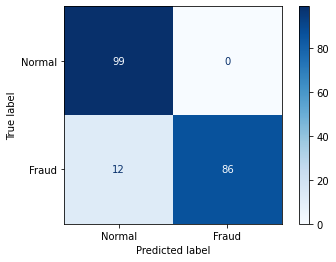

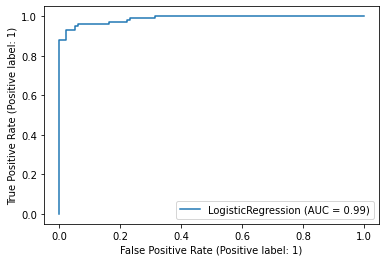

In [78]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr_predict = lr.predict(X_test)

lr_ac = accuracy_score(Y_test, lr_predict)*100
lr_f1 = f1_score(Y_test,lr_predict)*100
lr_pr = precision_score(Y_test,lr_predict)*100
lr_rec = recall_score(Y_test,lr_predict)*100
    
#confusion Matrix 
cm = confusion_matrix(Y_test, lr_predict)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal', 'Fraud'])
    
    
print(' LR Accuracy score: ', lr_ac)
print(' LR F1 Score: ',lr_f1)
print(' LR Precision Score: ', lr_pr)
print(' LR Recall Score: ', lr_rec)
print('____________________________________________________________________________________________________________')
print('')
print('Confusion Matrix and ROC Curve')
cmd.plot(cmap=plt.cm.Blues)
    
roc_disp = RocCurveDisplay.from_estimator(lr, X_test,Y_test)

**K Nearest Neighbour**

* Finding the best value for k 

In [82]:

def BestValueForK():
    
    accuracy_list = []
    for i in range(1,21):
        kn = KNeighborsClassifier(n_neighbors=i)
        kn.fit(X_train, Y_train)
        kn_predict = kn.predict(X_test)
        kn_ac = accuracy_score(Y_test, kn_predict)
        accuracy_list.append(kn_ac)
        
    max_accuracy = max(accuracy_list)
    print('Best value for K is : ', accuracy_list.index(max_accuracy))
    

BestValueForK()
        
        

Best value for K is :  4


 KNN Accuracy Score :  70.55837563451777
 KNN F1 score:  63.75000000000001
 KNN Precision Score:  82.25806451612904
 KNN Recall Score:  52.04081632653062
____________________________________________________________________________________________________________

Confusion Matrix and ROC Curve


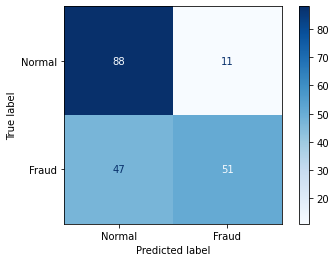

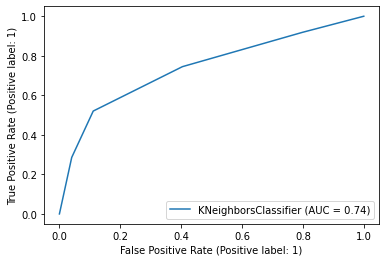

In [83]:

    kn = KNeighborsClassifier(n_neighbors=4)
    kn.fit(X_train, Y_train)
    kn_predict = kn.predict(X_test)
    
    kn_ac = accuracy_score(Y_test,kn_predict)*100
    kn_f1 = f1_score(Y_test, kn_predict)*100
    kn_pr = precision_score(Y_test, kn_predict)*100
    kn_rec = recall_score(Y_test, kn_predict)*100
    
    
    print(' KNN Accuracy Score : ', kn_ac)
    print(' KNN F1 score: ',kn_f1 )
    print(' KNN Precision Score: ',kn_pr)
    print(' KNN Recall Score: ', kn_rec)
    
    #Confusion Matrix and Roc Curve 
    cm = confusion_matrix(Y_test, kn_predict)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal', 'Fraud'])
    print('____________________________________________________________________________________________________________')
    print('')
    print('Confusion Matrix and ROC Curve')
    cmd.plot(cmap=plt.cm.Blues)
    
    roc_disp = RocCurveDisplay.from_estimator(kn, X_test,Y_test)

**Naive Bayes**

 GNB Accuracy Score :  86.29441624365482
 GNB F1 score:  84.21052631578948
 GNB Precision Score:  98.63013698630137
 GNB Recall Score:  73.46938775510205
____________________________________________________________________________________________________________

Confusion Matrix and ROC Curve


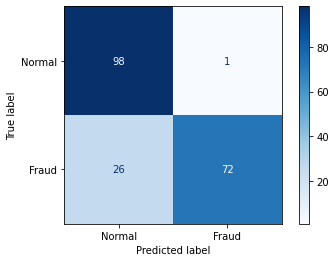

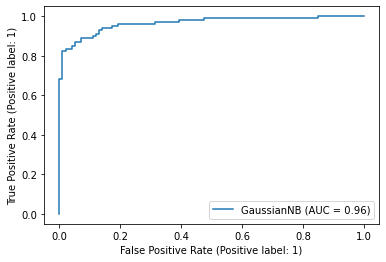

In [74]:

    nb = GaussianNB()
    nb.fit(X_train, Y_train)
    nb_predict = nb.predict(X_test)
    
    nb_ac = accuracy_score(Y_test,nb_predict)*100
    nb_f1 = f1_score(Y_test, nb_predict)*100
    nb_pr = precision_score(Y_test, nb_predict)*100
    nb_rec = recall_score(Y_test, nb_predict)*100
    
    print(' GNB Accuracy Score : ', nb_ac)
    print(' GNB F1 score: ', nb_f1)
    print(' GNB Precision Score: ',nb_pr)
    print(' GNB Recall Score: ', nb_rec)
    
    #Confusion Matrix and Roc Curve 
    
    cm = confusion_matrix(Y_test, nb_predict)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal', 'Fraud'])
    print('____________________________________________________________________________________________________________')
    print('')
    print('Confusion Matrix and ROC Curve')
    cmd.plot(cmap=plt.cm.Blues)
    
    roc_disp = RocCurveDisplay.from_estimator(nb, X_test,Y_test)
    

**Decision Tree Classifier**

 DTC Accuracy :  89.84771573604061
 DTC F1 Score : 89.79591836734694
 DTC Precission :   89.79591836734694
 DTC Recall Score:  89.79591836734694
____________________________________________________________________________________________________________

Confusion Matrix and ROC Curve


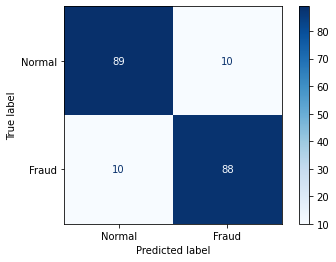

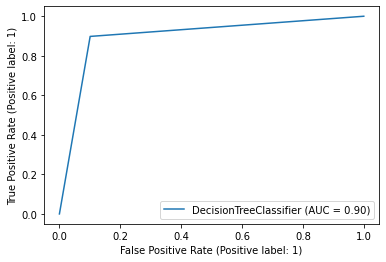

In [76]:

    dt = DecisionTreeClassifier()
    dt.fit(X_train, Y_train)
    dt_predict = dt.predict(X_test)
    
    dt_ac = accuracy_score(Y_test,dt_predict)*100
    dt_f1 = f1_score(Y_test,dt_predict)*100
    dt_pr = precision_score(Y_test,dt_predict)*100
    dt_rec = recall_score(Y_test,dt_predict)*100
    
    print(' DTC Accuracy : ',dt_ac)
    print(' DTC F1 Score :', dt_f1)
    print(' DTC Precission :  ', dt_pr)
    print(' DTC Recall Score: ',dt_rec)
    
    
    #Confusion Matrix and Roc Curve 
    cm = confusion_matrix(Y_test, dt_predict)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal', 'Fraud'])
    print('____________________________________________________________________________________________________________')
    print('')
    print('Confusion Matrix and ROC Curve')
    cmd.plot(cmap=plt.cm.Blues)
    
    roc_disp = RocCurveDisplay.from_estimator(dt, X_test,Y_test)

**Random Forest Classifier**

 RF Accuracy :  92.89340101522842
 RF F1 Score:  92.47311827956989
 RF Precission:  97.72727272727273
 RF Recall :  87.75510204081633
____________________________________________________________________________________________________________

Confusion Matrix and ROC Curve


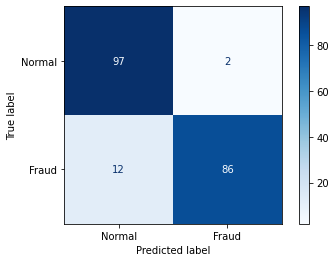

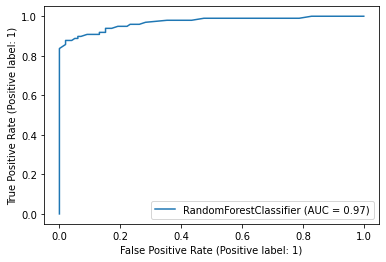

In [75]:

    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, Y_train)
    rf_predict = rf.predict(X_test)
    
    rf_ac = accuracy_score(Y_test,rf_predict)*100
    rf_f1 = f1_score(Y_test,rf_predict)*100
    rf_pr = precision_score(Y_test,rf_predict)*100
    rf_rec = recall_score(Y_test,rf_predict)*100
    
    print(' RF Accuracy : ', rf_ac)
    print(' RF F1 Score: ',rf_f1)
    print(' RF Precission: ',rf_pr)
    print(' RF Recall : ',rf_rec)
    
    #Confusion Matrix and Roc Curve 
    cm = confusion_matrix(Y_test, rf_predict)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal', 'Fraud'])
    print('____________________________________________________________________________________________________________')
    print('')
    print('Confusion Matrix and ROC Curve')
    cmd.plot(cmap=plt.cm.Blues)
    
    roc_disp = RocCurveDisplay.from_estimator(rf, X_test,Y_test)

# Performance Analysis
* Finding the best model 

In [128]:
result = {
    'Name': ['Logistic Regression','KNN','Random Forest','Decision Tree','Naive Bayes'],
    'Accuracy_Score ': [lr_ac,kn_ac,rf_ac,dt_ac,nb_ac],
    'F1_Score':[lr_f1,kn_f1,rf_f1,dt_f1,nb_f1],
    'Precision_Score ':[lr_pr, kn_pr, rf_pr,dt_pr,nb_pr],
    'Recall_Score':[lr_rec,kn_rec,rf_rec,dt_rec,nb_rec]
}

In [129]:
df3 = pd.DataFrame(result)

In [130]:
df3.head()

Name  Accuracy_Score    F1_Score  Precision_Score   \
0  Logistic Regression        93.908629  93.478261        100.000000   
1                  KNN        70.558376  63.750000         82.258065   
2        Random Forest        92.893401  92.473118         97.727273   
3        Decision Tree        89.847716  89.795918         89.795918   
4          Naive Bayes        86.294416  84.210526         98.630137   

   Recall_Score  
0     87.755102  
1     52.040816  
2     87.755102  
3     89.795918  
4     73.469388

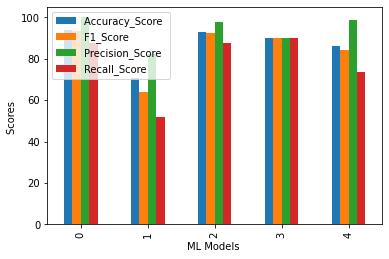

In [139]:
df3.plot(kind= 'bar' )
plt.xlabel('ML Models ')
plt.ylabel('Scores ')
plt.show()

**BAR PLOT**

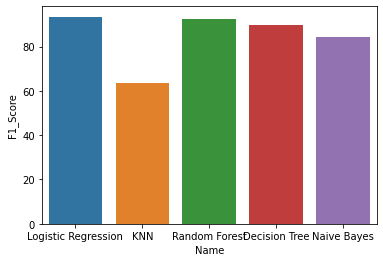

In [131]:
sns.barplot(x= df3.Name, y=df3.F1_Score)
plt.show()

* After training different classification models with our dataset ,we can see that The Accuracy and F1 score is much higher in the Logistic Regression model . 
* So the best model is Logistic Regression.